In [7]:
import os
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

# 图像预处理：数据增强和标准化
transform = transforms.Compose([
    transforms.Resize((224, 224)),            # 将图像缩放为224x224大小
    transforms.RandomHorizontalFlip(),        # 随机水平翻转
    transforms.RandomRotation(20),            # 随机旋转
    transforms.RandomAffine(0, translate=(0.1, 0.1)),  # 随机平移
#    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),  # 随机调整图像亮度、对比度、饱和度
    transforms.ToTensor(),                    # 将图像转为Tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # 数据标准化
])

# 自定义数据集类，用于加载图像和标签
class TinySegDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None):
        """
        :param annotations_file: 标签文件路径
        :param img_dir: 图像所在的目录
        :param transform: 图像预处理
        """
        self.annotations_file = annotations_file
        self.img_dir = img_dir
        self.transform = transform
        
        # 读取标签文件
        with open(annotations_file, 'r') as f:
            self.annotations = f.readlines()
        
    def __len__(self):
        return len(self.annotations)
    
    def __getitem__(self, idx):
        # 获取标签和图像路径
        line = self.annotations[idx].strip()
        img_name, label = line.split(": ")
        img_path = os.path.join(self.img_dir, img_name)
        
        # 打开图像
        image = Image.open(img_path).convert('RGB')
        
        # 应用预处理
        if self.transform:
            image = self.transform(image)
        
        return image, int(label)

# 实例化数据集
annotations_file = r"C:\Users\Yet Young\Desktop\documents\ML\tiny_seg_exp\TinySeg\labels.txt"  # 替换为你的标签文件路径
img_dir = r"C:\Users\Yet Young\Desktop\documents\ML\tiny_seg_exp\TinySeg\JPEGImages"  # 图像所在的目录
dataset = TinySegDataset(annotations_file, img_dir, transform)

test_size = 624
train_size = len(dataset) - test_size

# 切分数据集
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

# 创建数据加载器
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=0)

Epoch 1/100: 100%|██████████| 94/94 [00:29<00:00,  3.18it/s]


Epoch 1/100, Train Loss: 1.2655, Train Accuracy: 56.33%, Test Loss: 1.2356, Test Accuracy: 57.37%


Epoch 2/100: 100%|██████████| 94/94 [00:32<00:00,  2.87it/s]


Epoch 2/100, Train Loss: 1.1918, Train Accuracy: 57.20%, Test Loss: 1.2019, Test Accuracy: 56.89%


Epoch 3/100: 100%|██████████| 94/94 [00:33<00:00,  2.79it/s]


Epoch 3/100, Train Loss: 1.1600, Train Accuracy: 57.33%, Test Loss: 1.1847, Test Accuracy: 55.77%


Epoch 4/100: 100%|██████████| 94/94 [00:33<00:00,  2.82it/s]


Epoch 4/100, Train Loss: 1.1497, Train Accuracy: 57.70%, Test Loss: 1.1406, Test Accuracy: 57.53%


Epoch 5/100: 100%|██████████| 94/94 [00:35<00:00,  2.67it/s]


Epoch 5/100, Train Loss: 1.1165, Train Accuracy: 57.80%, Test Loss: 1.1208, Test Accuracy: 58.65%


Epoch 6/100: 100%|██████████| 94/94 [00:34<00:00,  2.72it/s]


Epoch 6/100, Train Loss: 1.0948, Train Accuracy: 58.87%, Test Loss: 1.1299, Test Accuracy: 58.49%


Epoch 7/100: 100%|██████████| 94/94 [00:32<00:00,  2.85it/s]


Epoch 7/100, Train Loss: 1.0783, Train Accuracy: 58.93%, Test Loss: 1.1198, Test Accuracy: 58.97%


Epoch 8/100: 100%|██████████| 94/94 [00:34<00:00,  2.74it/s]


Epoch 8/100, Train Loss: 1.0729, Train Accuracy: 59.35%, Test Loss: 1.0993, Test Accuracy: 58.97%


Epoch 9/100: 100%|██████████| 94/94 [00:33<00:00,  2.79it/s]


Epoch 9/100, Train Loss: 1.0712, Train Accuracy: 58.45%, Test Loss: 1.0945, Test Accuracy: 59.29%


Epoch 10/100: 100%|██████████| 94/94 [00:31<00:00,  2.95it/s]


Epoch 10/100, Train Loss: 1.0502, Train Accuracy: 59.82%, Test Loss: 1.0818, Test Accuracy: 59.62%


Epoch 11/100: 100%|██████████| 94/94 [00:33<00:00,  2.84it/s]


Epoch 11/100, Train Loss: 1.0462, Train Accuracy: 59.30%, Test Loss: 1.0981, Test Accuracy: 59.13%


Epoch 12/100: 100%|██████████| 94/94 [00:28<00:00,  3.25it/s]


Epoch 12/100, Train Loss: 1.0324, Train Accuracy: 61.00%, Test Loss: 1.0377, Test Accuracy: 58.65%


Epoch 13/100: 100%|██████████| 94/94 [00:28<00:00,  3.35it/s]


Epoch 13/100, Train Loss: 1.0211, Train Accuracy: 61.12%, Test Loss: 1.0445, Test Accuracy: 58.33%


Epoch 14/100: 100%|██████████| 94/94 [00:29<00:00,  3.24it/s]


Epoch 14/100, Train Loss: 1.0043, Train Accuracy: 61.48%, Test Loss: 1.0673, Test Accuracy: 61.22%


Epoch 15/100: 100%|██████████| 94/94 [00:29<00:00,  3.14it/s]


Epoch 15/100, Train Loss: 1.0032, Train Accuracy: 61.50%, Test Loss: 1.0379, Test Accuracy: 61.22%


Epoch 16/100: 100%|██████████| 94/94 [00:28<00:00,  3.27it/s]


Epoch 16/100, Train Loss: 0.9825, Train Accuracy: 61.90%, Test Loss: 1.0221, Test Accuracy: 60.74%


Epoch 17/100: 100%|██████████| 94/94 [00:30<00:00,  3.12it/s]


Epoch 17/100, Train Loss: 0.9769, Train Accuracy: 62.25%, Test Loss: 1.0125, Test Accuracy: 61.22%


Epoch 18/100: 100%|██████████| 94/94 [00:29<00:00,  3.17it/s]


Epoch 18/100, Train Loss: 0.9731, Train Accuracy: 62.80%, Test Loss: 0.9687, Test Accuracy: 63.30%


Epoch 19/100: 100%|██████████| 94/94 [00:28<00:00,  3.28it/s]


Epoch 19/100, Train Loss: 0.9543, Train Accuracy: 63.30%, Test Loss: 0.9843, Test Accuracy: 61.22%


Epoch 20/100: 100%|██████████| 94/94 [00:28<00:00,  3.35it/s]


Epoch 20/100, Train Loss: 0.9501, Train Accuracy: 62.77%, Test Loss: 1.0296, Test Accuracy: 59.46%


Epoch 21/100: 100%|██████████| 94/94 [00:27<00:00,  3.39it/s]


Epoch 21/100, Train Loss: 0.9667, Train Accuracy: 62.45%, Test Loss: 1.0077, Test Accuracy: 61.54%


Epoch 22/100: 100%|██████████| 94/94 [00:27<00:00,  3.37it/s]


Epoch 22/100, Train Loss: 0.9478, Train Accuracy: 63.52%, Test Loss: 0.9824, Test Accuracy: 61.38%


Epoch 23/100: 100%|██████████| 94/94 [00:27<00:00,  3.36it/s]


Epoch 23/100, Train Loss: 0.9377, Train Accuracy: 63.90%, Test Loss: 1.0231, Test Accuracy: 61.06%


Epoch 24/100: 100%|██████████| 94/94 [00:29<00:00,  3.19it/s]


Epoch 24/100, Train Loss: 0.9271, Train Accuracy: 64.10%, Test Loss: 0.9675, Test Accuracy: 63.30%


Epoch 25/100: 100%|██████████| 94/94 [00:30<00:00,  3.08it/s]


Epoch 25/100, Train Loss: 0.9168, Train Accuracy: 64.27%, Test Loss: 0.9706, Test Accuracy: 59.94%


Epoch 26/100: 100%|██████████| 94/94 [00:30<00:00,  3.06it/s]


Epoch 26/100, Train Loss: 0.9199, Train Accuracy: 64.23%, Test Loss: 0.9387, Test Accuracy: 63.30%


Epoch 27/100: 100%|██████████| 94/94 [00:28<00:00,  3.34it/s]


Epoch 27/100, Train Loss: 0.9268, Train Accuracy: 64.15%, Test Loss: 0.9644, Test Accuracy: 62.34%


Epoch 28/100: 100%|██████████| 94/94 [00:27<00:00,  3.38it/s]


Epoch 28/100, Train Loss: 0.9230, Train Accuracy: 63.52%, Test Loss: 0.9541, Test Accuracy: 62.02%


Epoch 29/100: 100%|██████████| 94/94 [00:27<00:00,  3.39it/s]


Epoch 29/100, Train Loss: 0.9185, Train Accuracy: 63.75%, Test Loss: 0.9628, Test Accuracy: 61.38%


Epoch 30/100: 100%|██████████| 94/94 [00:27<00:00,  3.37it/s]


Epoch 30/100, Train Loss: 0.9119, Train Accuracy: 64.03%, Test Loss: 1.0062, Test Accuracy: 62.50%


Epoch 31/100: 100%|██████████| 94/94 [00:28<00:00,  3.28it/s]


Epoch 31/100, Train Loss: 0.9198, Train Accuracy: 64.52%, Test Loss: 0.9463, Test Accuracy: 62.34%


Epoch 32/100: 100%|██████████| 94/94 [00:29<00:00,  3.23it/s]


Epoch 32/100, Train Loss: 0.9183, Train Accuracy: 64.43%, Test Loss: 0.9919, Test Accuracy: 62.98%


Epoch 33/100: 100%|██████████| 94/94 [00:31<00:00,  2.99it/s]


Epoch 33/100, Train Loss: 0.9030, Train Accuracy: 64.53%, Test Loss: 0.9682, Test Accuracy: 63.30%


Epoch 34/100: 100%|██████████| 94/94 [00:28<00:00,  3.24it/s]


Epoch 34/100, Train Loss: 0.8986, Train Accuracy: 64.60%, Test Loss: 0.9557, Test Accuracy: 64.90%


Epoch 35/100: 100%|██████████| 94/94 [00:28<00:00,  3.28it/s]


Epoch 35/100, Train Loss: 0.8950, Train Accuracy: 65.38%, Test Loss: 0.9588, Test Accuracy: 63.30%


Epoch 36/100: 100%|██████████| 94/94 [00:29<00:00,  3.19it/s]


Epoch 36/100, Train Loss: 0.8729, Train Accuracy: 65.82%, Test Loss: 0.9134, Test Accuracy: 64.58%


Epoch 37/100: 100%|██████████| 94/94 [00:28<00:00,  3.31it/s]


Epoch 37/100, Train Loss: 0.8565, Train Accuracy: 65.85%, Test Loss: 0.9307, Test Accuracy: 63.46%


Epoch 38/100: 100%|██████████| 94/94 [00:31<00:00,  2.96it/s]


Epoch 38/100, Train Loss: 0.8681, Train Accuracy: 65.87%, Test Loss: 0.9534, Test Accuracy: 61.06%


Epoch 39/100: 100%|██████████| 94/94 [00:32<00:00,  2.88it/s]


Epoch 39/100, Train Loss: 0.8549, Train Accuracy: 66.33%, Test Loss: 0.9485, Test Accuracy: 62.66%


Epoch 40/100: 100%|██████████| 94/94 [00:32<00:00,  2.92it/s]


Epoch 40/100, Train Loss: 0.8616, Train Accuracy: 65.90%, Test Loss: 0.8960, Test Accuracy: 65.54%


Epoch 41/100: 100%|██████████| 94/94 [00:28<00:00,  3.34it/s]


Epoch 41/100, Train Loss: 0.8426, Train Accuracy: 67.17%, Test Loss: 0.9072, Test Accuracy: 65.87%


Epoch 42/100: 100%|██████████| 94/94 [00:28<00:00,  3.26it/s]


Epoch 42/100, Train Loss: 0.8586, Train Accuracy: 65.72%, Test Loss: 0.9282, Test Accuracy: 63.62%


Epoch 43/100: 100%|██████████| 94/94 [00:28<00:00,  3.30it/s]


Epoch 43/100, Train Loss: 0.8336, Train Accuracy: 67.48%, Test Loss: 0.9072, Test Accuracy: 65.22%


Epoch 44/100: 100%|██████████| 94/94 [00:31<00:00,  3.02it/s]


Epoch 44/100, Train Loss: 0.8374, Train Accuracy: 67.48%, Test Loss: 0.9403, Test Accuracy: 64.74%


Epoch 45/100: 100%|██████████| 94/94 [00:33<00:00,  2.81it/s]


Epoch 45/100, Train Loss: 0.8354, Train Accuracy: 67.15%, Test Loss: 0.9023, Test Accuracy: 66.35%


Epoch 46/100: 100%|██████████| 94/94 [00:33<00:00,  2.82it/s]


Epoch 46/100, Train Loss: 0.8310, Train Accuracy: 67.88%, Test Loss: 0.8996, Test Accuracy: 65.87%


Epoch 47/100: 100%|██████████| 94/94 [00:33<00:00,  2.83it/s]


Epoch 47/100, Train Loss: 0.8492, Train Accuracy: 66.88%, Test Loss: 0.9439, Test Accuracy: 62.34%


Epoch 48/100: 100%|██████████| 94/94 [00:32<00:00,  2.88it/s]


Epoch 48/100, Train Loss: 0.8409, Train Accuracy: 66.25%, Test Loss: 0.9623, Test Accuracy: 63.78%


Epoch 49/100: 100%|██████████| 94/94 [00:31<00:00,  3.03it/s]


Epoch 49/100, Train Loss: 0.8463, Train Accuracy: 66.80%, Test Loss: 0.8974, Test Accuracy: 65.87%


Epoch 50/100: 100%|██████████| 94/94 [00:28<00:00,  3.34it/s]


Epoch 50/100, Train Loss: 0.8267, Train Accuracy: 67.42%, Test Loss: 0.9282, Test Accuracy: 64.58%


Epoch 51/100: 100%|██████████| 94/94 [00:28<00:00,  3.27it/s]


Epoch 51/100, Train Loss: 0.8151, Train Accuracy: 67.92%, Test Loss: 0.9401, Test Accuracy: 66.19%


Epoch 52/100: 100%|██████████| 94/94 [00:28<00:00,  3.28it/s]


Epoch 52/100, Train Loss: 0.8265, Train Accuracy: 67.37%, Test Loss: 0.9119, Test Accuracy: 63.94%


Epoch 53/100: 100%|██████████| 94/94 [00:31<00:00,  3.00it/s]


Epoch 53/100, Train Loss: 0.8295, Train Accuracy: 67.67%, Test Loss: 0.9127, Test Accuracy: 62.82%


Epoch 54/100: 100%|██████████| 94/94 [00:33<00:00,  2.82it/s]


Epoch 54/100, Train Loss: 0.8043, Train Accuracy: 68.97%, Test Loss: 0.9310, Test Accuracy: 62.02%


Epoch 55/100: 100%|██████████| 94/94 [00:32<00:00,  2.87it/s]


Epoch 55/100, Train Loss: 0.8168, Train Accuracy: 68.15%, Test Loss: 0.9781, Test Accuracy: 64.26%


Epoch 56/100: 100%|██████████| 94/94 [00:32<00:00,  2.90it/s]


Epoch 56/100, Train Loss: 0.8136, Train Accuracy: 68.33%, Test Loss: 0.8895, Test Accuracy: 65.54%


Epoch 57/100: 100%|██████████| 94/94 [00:30<00:00,  3.05it/s]


Epoch 57/100, Train Loss: 0.8001, Train Accuracy: 68.65%, Test Loss: 0.8975, Test Accuracy: 66.99%


Epoch 58/100: 100%|██████████| 94/94 [00:26<00:00,  3.57it/s]


Epoch 58/100, Train Loss: 0.8179, Train Accuracy: 67.03%, Test Loss: 0.9251, Test Accuracy: 65.06%


Epoch 59/100: 100%|██████████| 94/94 [00:27<00:00,  3.37it/s]


Epoch 59/100, Train Loss: 0.7957, Train Accuracy: 69.42%, Test Loss: 0.9105, Test Accuracy: 65.87%


Epoch 60/100: 100%|██████████| 94/94 [00:28<00:00,  3.33it/s]


Epoch 60/100, Train Loss: 0.7914, Train Accuracy: 69.48%, Test Loss: 0.8969, Test Accuracy: 66.83%


Epoch 61/100: 100%|██████████| 94/94 [00:28<00:00,  3.34it/s]


Epoch 61/100, Train Loss: 0.7822, Train Accuracy: 69.32%, Test Loss: 0.8995, Test Accuracy: 65.22%


Epoch 62/100: 100%|██████████| 94/94 [00:28<00:00,  3.32it/s]


Epoch 62/100, Train Loss: 0.7619, Train Accuracy: 70.45%, Test Loss: 0.9463, Test Accuracy: 63.14%


Epoch 63/100: 100%|██████████| 94/94 [00:28<00:00,  3.32it/s]


Epoch 63/100, Train Loss: 0.7683, Train Accuracy: 70.30%, Test Loss: 0.9183, Test Accuracy: 65.71%


Epoch 64/100: 100%|██████████| 94/94 [00:28<00:00,  3.31it/s]


Epoch 64/100, Train Loss: 0.7657, Train Accuracy: 69.60%, Test Loss: 0.9343, Test Accuracy: 66.03%


Epoch 65/100: 100%|██████████| 94/94 [00:28<00:00,  3.33it/s]


Epoch 65/100, Train Loss: 0.7872, Train Accuracy: 69.52%, Test Loss: 0.9187, Test Accuracy: 65.38%


Epoch 66/100: 100%|██████████| 94/94 [00:28<00:00,  3.27it/s]


Epoch 66/100, Train Loss: 0.7618, Train Accuracy: 70.13%, Test Loss: 0.9460, Test Accuracy: 64.10%


Epoch 67/100: 100%|██████████| 94/94 [00:28<00:00,  3.24it/s]


Epoch 67/100, Train Loss: 0.7603, Train Accuracy: 70.03%, Test Loss: 0.8767, Test Accuracy: 67.15%


Epoch 68/100: 100%|██████████| 94/94 [00:28<00:00,  3.25it/s]


Epoch 68/100, Train Loss: 0.7746, Train Accuracy: 69.72%, Test Loss: 0.9016, Test Accuracy: 65.38%


Epoch 69/100: 100%|██████████| 94/94 [00:29<00:00,  3.22it/s]


Epoch 69/100, Train Loss: 0.7479, Train Accuracy: 70.63%, Test Loss: 0.9223, Test Accuracy: 66.99%


Epoch 70/100: 100%|██████████| 94/94 [00:28<00:00,  3.30it/s]


Epoch 70/100, Train Loss: 0.7648, Train Accuracy: 70.15%, Test Loss: 0.9395, Test Accuracy: 65.87%


Epoch 71/100: 100%|██████████| 94/94 [00:28<00:00,  3.33it/s]


Epoch 71/100, Train Loss: 0.7468, Train Accuracy: 70.35%, Test Loss: 0.9180, Test Accuracy: 66.67%


Epoch 72/100: 100%|██████████| 94/94 [00:28<00:00,  3.33it/s]


Epoch 72/100, Train Loss: 0.7490, Train Accuracy: 70.45%, Test Loss: 0.9216, Test Accuracy: 68.27%


Epoch 73/100: 100%|██████████| 94/94 [00:28<00:00,  3.33it/s]


Epoch 73/100, Train Loss: 0.7363, Train Accuracy: 70.37%, Test Loss: 0.9450, Test Accuracy: 65.38%


Epoch 74/100: 100%|██████████| 94/94 [00:28<00:00,  3.32it/s]


Epoch 74/100, Train Loss: 0.7489, Train Accuracy: 70.38%, Test Loss: 0.9432, Test Accuracy: 65.54%


Epoch 75/100: 100%|██████████| 94/94 [00:28<00:00,  3.32it/s]


Epoch 75/100, Train Loss: 0.7465, Train Accuracy: 70.73%, Test Loss: 0.8932, Test Accuracy: 66.03%


Epoch 76/100: 100%|██████████| 94/94 [00:28<00:00,  3.34it/s]


Epoch 76/100, Train Loss: 0.7169, Train Accuracy: 72.17%, Test Loss: 0.8952, Test Accuracy: 64.42%


Epoch 77/100: 100%|██████████| 94/94 [00:28<00:00,  3.33it/s]


Epoch 77/100, Train Loss: 0.7263, Train Accuracy: 72.05%, Test Loss: 0.9424, Test Accuracy: 65.06%


Epoch 78/100: 100%|██████████| 94/94 [00:28<00:00,  3.33it/s]


Epoch 78/100, Train Loss: 0.7147, Train Accuracy: 72.03%, Test Loss: 0.9400, Test Accuracy: 67.15%


Epoch 79/100: 100%|██████████| 94/94 [00:28<00:00,  3.33it/s]


Epoch 79/100, Train Loss: 0.7119, Train Accuracy: 72.42%, Test Loss: 0.9102, Test Accuracy: 65.71%


Epoch 80/100: 100%|██████████| 94/94 [00:28<00:00,  3.34it/s]


Epoch 80/100, Train Loss: 0.7077, Train Accuracy: 72.88%, Test Loss: 0.9140, Test Accuracy: 64.26%


Epoch 81/100: 100%|██████████| 94/94 [00:28<00:00,  3.33it/s]


Epoch 81/100, Train Loss: 0.7552, Train Accuracy: 69.83%, Test Loss: 0.9485, Test Accuracy: 62.82%


Epoch 82/100: 100%|██████████| 94/94 [00:28<00:00,  3.25it/s]


Epoch 82/100, Train Loss: 0.7366, Train Accuracy: 70.77%, Test Loss: 0.9411, Test Accuracy: 64.42%


Epoch 83/100: 100%|██████████| 94/94 [00:29<00:00,  3.23it/s]


Epoch 83/100, Train Loss: 0.7330, Train Accuracy: 71.02%, Test Loss: 0.9043, Test Accuracy: 68.27%


Epoch 84/100: 100%|██████████| 94/94 [00:29<00:00,  3.22it/s]


Epoch 84/100, Train Loss: 0.7338, Train Accuracy: 70.45%, Test Loss: 0.9336, Test Accuracy: 66.03%


Epoch 85/100: 100%|██████████| 94/94 [00:28<00:00,  3.32it/s]


Epoch 85/100, Train Loss: 0.7082, Train Accuracy: 71.97%, Test Loss: 0.9862, Test Accuracy: 64.74%


Epoch 86/100: 100%|██████████| 94/94 [00:30<00:00,  3.10it/s]


Epoch 86/100, Train Loss: 0.7058, Train Accuracy: 72.13%, Test Loss: 0.8994, Test Accuracy: 66.83%


Epoch 87/100: 100%|██████████| 94/94 [00:30<00:00,  3.04it/s]


Epoch 87/100, Train Loss: 0.6951, Train Accuracy: 72.75%, Test Loss: 0.9432, Test Accuracy: 63.62%


Epoch 88/100: 100%|██████████| 94/94 [00:30<00:00,  3.13it/s]


Epoch 88/100, Train Loss: 0.7008, Train Accuracy: 72.30%, Test Loss: 0.9450, Test Accuracy: 67.79%


Epoch 89/100: 100%|██████████| 94/94 [00:30<00:00,  3.05it/s]


Epoch 89/100, Train Loss: 0.6971, Train Accuracy: 72.47%, Test Loss: 0.9580, Test Accuracy: 65.54%


Epoch 90/100: 100%|██████████| 94/94 [00:30<00:00,  3.04it/s]


Epoch 90/100, Train Loss: 0.6691, Train Accuracy: 73.17%, Test Loss: 0.8637, Test Accuracy: 66.51%


Epoch 91/100: 100%|██████████| 94/94 [00:29<00:00,  3.20it/s]


Epoch 91/100, Train Loss: 0.6659, Train Accuracy: 73.60%, Test Loss: 0.9650, Test Accuracy: 65.54%


Epoch 92/100: 100%|██████████| 94/94 [00:32<00:00,  2.94it/s]


Epoch 92/100, Train Loss: 0.6753, Train Accuracy: 72.88%, Test Loss: 0.9113, Test Accuracy: 65.71%


Epoch 93/100: 100%|██████████| 94/94 [00:31<00:00,  3.01it/s]


Epoch 93/100, Train Loss: 0.6701, Train Accuracy: 73.60%, Test Loss: 0.9112, Test Accuracy: 67.63%


Epoch 94/100: 100%|██████████| 94/94 [00:30<00:00,  3.04it/s]


Epoch 94/100, Train Loss: 0.6705, Train Accuracy: 73.62%, Test Loss: 0.9265, Test Accuracy: 66.67%


Epoch 95/100: 100%|██████████| 94/94 [00:31<00:00,  2.98it/s]


Epoch 95/100, Train Loss: 0.6626, Train Accuracy: 74.12%, Test Loss: 1.0252, Test Accuracy: 64.90%


Epoch 96/100: 100%|██████████| 94/94 [00:31<00:00,  2.95it/s]


Epoch 96/100, Train Loss: 0.6535, Train Accuracy: 74.63%, Test Loss: 0.9709, Test Accuracy: 67.15%


Epoch 97/100: 100%|██████████| 94/94 [00:30<00:00,  3.12it/s]


Epoch 97/100, Train Loss: 0.6317, Train Accuracy: 74.67%, Test Loss: 0.9073, Test Accuracy: 67.79%


Epoch 98/100: 100%|██████████| 94/94 [00:27<00:00,  3.44it/s]


Epoch 98/100, Train Loss: 0.6517, Train Accuracy: 74.65%, Test Loss: 0.9441, Test Accuracy: 68.59%


Epoch 99/100: 100%|██████████| 94/94 [00:27<00:00,  3.38it/s]


Epoch 99/100, Train Loss: 0.6440, Train Accuracy: 74.22%, Test Loss: 1.0063, Test Accuracy: 65.06%


Epoch 100/100: 100%|██████████| 94/94 [00:27<00:00,  3.37it/s]


Epoch 100/100, Train Loss: 0.6252, Train Accuracy: 75.13%, Test Loss: 0.9642, Test Accuracy: 65.71%


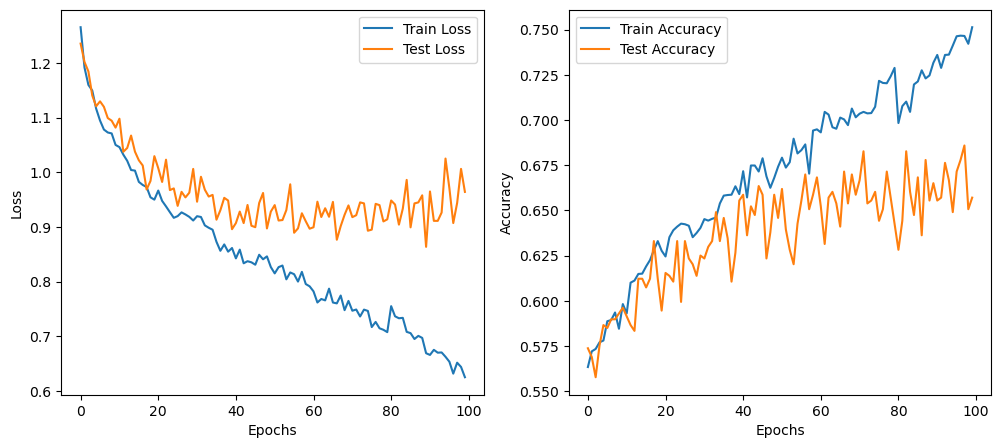

ValueError: multiclass format is not supported

In [ ]:
import os
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from tqdm import tqdm


# 自定义数据集类，用于加载图像和标签
class TinySegDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None):
        self.annotations_file = annotations_file
        self.img_dir = img_dir
        self.transform = transform
        
        with open(annotations_file, 'r') as f:
            self.annotations = f.readlines()
        
    def __len__(self):
        return len(self.annotations)
    
    def __getitem__(self, idx):
        line = self.annotations[idx].strip()
        img_name, label = line.split(": ")
        img_path = os.path.join(self.img_dir, img_name)
        
        image = Image.open(img_path).convert('RGB')
        
        if self.transform:
            image = self.transform(image)
        
        return image, int(label)

# 自定义的多头自注意力模块
class MultiHeadAttention(nn.Module):
    def __init__(self, emb_dim, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.emb_dim = emb_dim
        self.head_dim = emb_dim // num_heads
        
        assert emb_dim % num_heads == 0, "Embedding dimension must be divisible by number of heads."
        
        self.query_proj = nn.Linear(emb_dim, emb_dim)
        self.key_proj = nn.Linear(emb_dim, emb_dim)
        self.value_proj = nn.Linear(emb_dim, emb_dim)
        self.out_proj = nn.Linear(emb_dim, emb_dim)

    def forward(self, query, key, value):
        batch_size = query.size(0)

        Q = self.query_proj(query).view(batch_size, -1, self.num_heads, self.head_dim).transpose(1, 2)
        K = self.key_proj(key).view(batch_size, -1, self.num_heads, self.head_dim).transpose(1, 2)
        V = self.value_proj(value).view(batch_size, -1, self.num_heads, self.head_dim).transpose(1, 2)

        attention_scores = torch.matmul(Q, K.transpose(-2, -1)) / (self.head_dim ** 0.5)
        attention_weights = torch.softmax(attention_scores, dim=-1)

        out = torch.matmul(attention_weights, V).transpose(1, 2).contiguous().view(batch_size, -1, self.emb_dim)
        out = self.out_proj(out)
        return out

# 前馈网络
class FeedForward(nn.Module):
    def __init__(self, emb_dim, ff_dim):
        super(FeedForward, self).__init__()
        self.fc1 = nn.Linear(emb_dim, ff_dim)
        self.fc2 = nn.Linear(ff_dim, emb_dim)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Transformer 编码器层
class TransformerEncoderLayer(nn.Module):
    def __init__(self, emb_dim, num_heads, ff_dim):
        super(TransformerEncoderLayer, self).__init__()
        self.attention = MultiHeadAttention(emb_dim, num_heads)
        self.feed_forward = FeedForward(emb_dim, ff_dim)
        self.layer_norm1 = nn.LayerNorm(emb_dim)
        self.layer_norm2 = nn.LayerNorm(emb_dim)
        self.dropout = nn.Dropout(0.1)

    def forward(self, x):
        attention_out = self.attention(x, x, x)
        x = self.layer_norm1(x + self.dropout(attention_out)) 

        ff_out = self.feed_forward(x)
        x = self.layer_norm2(x + self.dropout(ff_out))

        return x

# Vision Transformer (ViT)
class VisionTransformer(nn.Module):
    def __init__(self, image_size, patch_size, num_classes, emb_dim, num_heads, num_layers, ff_dim):
        super(VisionTransformer, self).__init__()

        self.patch_size = patch_size
        self.image_size = image_size
        self.num_patches = (image_size // patch_size) ** 2
        self.emb_dim = emb_dim

        self.patch_embed = nn.Conv2d(3, emb_dim, kernel_size=patch_size, stride=patch_size)
        self.positional_encoding = nn.Parameter(torch.randn(1, self.num_patches, emb_dim))

        self.encoder_layers = nn.ModuleList([
            TransformerEncoderLayer(emb_dim, num_heads, ff_dim) for _ in range(num_layers)
        ])

        self.fc = nn.Linear(emb_dim, num_classes)

    def forward(self, x):
        x = self.patch_embed(x)
        x = x.flatten(2).transpose(1, 2)

        x = x + self.positional_encoding

        for layer in self.encoder_layers:
            x = layer(x)

        x = x.mean(dim=1)
        x = self.fc(x)
        return x

# 实例化数据集
annotations_file = r"C:\Users\Yet Young\Desktop\documents\ML\tiny_seg_exp\TinySeg\labels.txt"
img_dir = r"C:\Users\Yet Young\Desktop\documents\ML\tiny_seg_exp\TinySeg\JPEGImages"
dataset = TinySegDataset(annotations_file, img_dir, transform)

test_size = 624
train_size = len(dataset) - test_size

train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=0)

# 训练模型
model = VisionTransformer(image_size=224, patch_size=16, num_classes=5, emb_dim=128, num_heads=4, num_layers=6, ff_dim=512)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

epochs = 100
train_losses, train_accuracies = [], []
test_losses, test_accuracies = [], []

for epoch in range(epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(correct / total)

    # 测试集
    model.eval()
    test_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_losses.append(test_loss / len(test_loader))
    test_accuracies.append(correct / total)

    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1]*100:.2f}%, Test Loss: {test_losses[-1]:.4f}, Test Accuracy: {test_accuracies[-1]*100:.2f}%")

